<a href="https://colab.research.google.com/github/tranhuuan170302/Analysis-market-in-job-information-technology/blob/main/Model_BERTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mô tả cách thức xử lí<br>
### Bước 1: thực hiện đọc 1 file csv và lấy 2 cột chính là cột "Summary", "JobUrl".<br>
  + cột Summary: là cột mô tả công việc và yêu cầu, kinh nghiệm trong công việc.<br>
  + cột JobUrl: là cột tên công viêc.<br>


### Bước 2: Thực hiện tiền xử lí dữ liệu.<br>
  + xóa kí tự '\n'. <br>
  + Tạo một danh sách keyword (danh sách keyword này dựa theo thuật toán tf-idf để lựa chọn ra các danh sách các keyword mà em được cho là nó quan trọng nhất).<br>
  + Sau đó đơn giản hóa các keyword này đi ví dụ: programmer => program để có thể dễ lấy được dữ liệu một cách tổng quan nhất.<br>
  + Giá trị của cột Summary là một đoạn text. Vì vậy ta chia nhỏ ra thành các câu để dễ thực hiện việc xử lí dữ liệu theo keyword đông thời giúp mô hình BERTopic tốt hơn.<br>
  + Lọc dữ liệu từ các câu theo các keywords đã khởi tạo. Các câu có từ nằm trong keywords sẽ được giữ lại, các câu không có thì sẽ có giá trị None.<br>
  + các dòng mang giá trị None sẽ được xóa hết đi. Các câu có giá trị khác None sẽ được thực hiện xóa bỏ các từ stopword ví dụ: is, a, the, and,...<br>

    

### Bước 3: áp dụng mô hình BERTopic. Đây là mô hình thuật toán phân cụm. Thuật toán BERTopic trải qua 3 giao đoạn. <br>
  + Giai đoạn 1: Đọc tài liệu. Đầu vào sẽ là cột 'review_lemmatized' cột này đã được đi qua xử lí ở bước 2. BERTopic sẽ chuyển các câu này thày một vector.<br>
  + Bước 2: phân cụm tài liệu.<br>
    + Sau khi thực hiện giai đoạn 1 thì sẽ thực hiện mô hình phân cụm các câu dựa trên các vector này. Mô hình sẽ sử dụng UMAP (Uniform Manifold Approximation & Projection) là một thuật toán để giảm chiều dữ liệu (Mỗi topic đều được thể hiện thông qua một tập hợp các từ lại với nhau. Nhưng có một vài từ thì lại không có mang tính chất thể hiện nhiều. Vì vậy ta sử dụng thuật toán UMAP để giảm thiểu nó đi).<br>
  + Bước 3: Topic Representation.<br>
    + Sau khi mỗi câu đã được phân cụm rồi. Thì thuật toán sẽ áp một c-tf-idf dựa trên tf-idf để chọn ra nhưng từ quan trọng nhất trong câu để đại diện.<br>


### Bước 4: Thực hiện kiểm tra mô hình thông qua trực quan hóa dữ liệu. <br>

# Import libaries

In [ ]:
# Install bertopic
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 49.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
    

In [ ]:
# Data processing
import pandas as pd
import numpy as np

# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

# Topic model
from bertopic import BERTopic

# Dimension reduction
from umap import UMAP

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
text = pd.read_csv('/content/drive/MyDrive/indeed/resultData.csv')

In [ ]:
text.head()

,Unnamed: 0,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl
0,0,.Net Developer,SmartDev,Ðà Nẵng,Posted\nPosted 14 days ago,2023-01-25,Company Description\nSmartDev is a leading pro...,.NET Developer\n
1,1,Intern / Fresher Developer,DXC Technology,Thành phố Hồ Chí Minh,Employer\nActive 22 days ago,2023-01-25,Overview:\nHow would you like to join an inter...,.NET Developer\n
2,2,.NET Developer (Middle/Senior level),SIOUX,Ðà Nẵng,Posted\nPosted 30+ days ago,2023-01-25,Sioux Group was founded in 1996 in the Netherl...,.NET Developer\n
3,3,Jun/Mid/Senior .NET Developer,Saigon Technology,Ðà Nẵng,Posted\nPosted 18 days ago,2023-01-25,"Up to $2,200\nJunior, Middle, Senior\nDa Nang\...",.NET Developer\n
4,4,"Web Developer (.NET, ASP.NET, C#)",NPV Corp,Ðà Nẵng,Posted\nPosted 16 days ago,2023-01-25,"Web Developer (.NET, ASP.NET, C#)\nNPV Corp\nỨ...",.NET Developer\n


In [ ]:
review = text[['Summary', 'JobUrl']]

In [ ]:
review.shape

(4379, 2)

In [ ]:
review['Summary'] = review['Summary'].str.replace('\n', '')
review['JobUrl'] = review['JobUrl'].str.replace('\n', '')

In [ ]:
# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
review = review.reset_index()

In [ ]:
review.head()

,index,Summary,JobUrl
0,0,Company DescriptionSmartDev is a leading provi...,.NET Developer
1,1,Overview:How would you like to join an interna...,.NET Developer
2,2,Sioux Group was founded in 1996 in the Netherl...,.NET Developer
3,3,"Up to $2,200Junior, Middle, SeniorDa NangFull-...",.NET Developer
4,4,"Web Developer (.NET, ASP.NET, C#)NPV CorpỨng T...",.NET Developer


In [ ]:
text['Summary'][0]

'Company Description\nSmartDev is a leading provider of global software solutions. The company was established in 2014 and is a wholly owned subsidiary of Verysell Technologies Group (Switzerland).\nSmartDev combines renowned Swiss quality with the Vietnamese passion to provide excellence and value. We brings together smart people both internally and externally to create partnerships that push boundaries and challenge the status quo.\nAs part of SmartDev’s aggressive growth plan we are looking to expand our development team, we (https://smartdev.com/) offers tailor-made mobile apps and websites with the most popular frontend and back-end technologies. We are currently works with about 140 developers.\n\nJob Description\n\nYou will report to PM (Project Manager)\nCollaborate with teams to product software design and architecture\nWrite clean, scalable code using .Net programming languages\nTest and deploy application and systems\nRevise, update, refactor and debugs code\nDevelop documen

In [ ]:
import re
from nltk.stem import PorterStemmer
from nltk import pos_tag

In [ ]:
# got these keywords by looking at some examples and using existing knowledge.
tool_keywords1 = ['sql', 'linqpad', 'teamcity', 'octopus', 'ncrunch', 'nuget', 'nunit', 'omnisharp', 'jetBrains rider', 'windbg', '.net reflector',
                  'reSharper', 'python', 'pytorch', 'sql', 'mxnet', 'mlflow', 'einstein', 'theano', 'pyspark', 'solr', 'mahout', 'html', 'css',
                  'cassandra', 'aws', 'powerpoint', 'spark', 'pig', 'sas', 'java', 'nosql', 'docker', 'salesforce', 'scala', 'r',
                  'c', 'c++', 'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow', 'clojure',
                  'caffe', 'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'gcp', 'mongodb', 'mysql', 'oracle', 
                  'redshift', 'snowflake', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl', 'bigquery', 'unix', 'react',
                  'scikit', 'powerbi', 's3', 'ec2', 'lambda', 'ssrs', 'kubernetes', 'hana', 'spacy', 'tf', 'django', 'sagemaker',
                  'seaborn', 'mllib', 'github', 'git', 'elasticsearch', 'splunk', 'airflow', 'looker', 'rapidminer', 'birt', 'pentaho', 
                  'jquery', 'nodejs', 'd3', 'plotly', 'bokeh', 'xgboost', 'rstudio', 'shiny', 'dash', 'h20', 'h2o', 'hadoop', 'mapreduce', 
                  'hive', 'cognos', 'angular', 'nltk', 'flask', 'node', 'firebase', 'bigtable', 'rust', 'php', 'cntk', 'lightgbm', 
                  'kubeflow', 'rpython', 'unixlinux', 'postgressql', 'postgresql', 'postgres', 'hbase', 'dask', 'ruby', 'julia', 'tensor',
                  # added r packages doesn't seem to impact the result
                  'dplyr','ggplot2','esquisse','bioconductor','shiny','lubridate','knitr','mlr','quanteda','dt','rcrawler','caret','rmarkdown',
                  'leaflet','janitor','ggvis','plotly','rcharts','rbokeh','broom','stringr','magrittr','slidify','rvest',
                  'rmysql','rsqlite','prophet','glmnet','text2vec','snowballc','quantmod','rstan','swirl','datasciencer', 'amazon web services', 'google cloud', 'sql server',
                  
                  
                  
                'statistics', 'cleansing', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly',
                'dashboard', 'geospatial', 'ocr', 'econometrics', 'pca', 'gis', 'svm', 'svd', 'tuning', 'hyperparameter', 'hypothesis',
                'salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory',
                'recommender', 'recommendations', 'research', 'sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics',
                'chi', 'knn', 'outlier', 'etl', 'normalization', 'classification', 'optimizing', 'prediction', 'forecasting',
                'clustering', 'cluster', 'optimization', 'visualization', 'nlp', 'c#', 'negotiation', 'self learning', 
                'regression', 'logistic', 'nn', 'cnn', 'glm', 'sloving', 'ux ui', 'teamwork', 'creative thinking',
                'rnn', 'lstm', 'gbm', 'boosting', 'recurrent', 'convolutional', 'bayesian',
                'bayes', 'random forest', 'natural language processing', 'machine learning', 'decision tree', 'deep learning', 'experimental design',
                'time series', 'nearest neighbors', 'neural network', 'support vector machine', 'computer vision', 'machine vision', 'dimensionality reduction', 
                'text analytics', 'power bi', 'a/b testing', 'ab testing', 'chat bot', 'data mining',
                
                
                'bs', 'bachelor', 'undergraduate', 'certificate',
               'master', 'graduate', 'mba', 'intermediate',
               'phd', 'ph.d', 'ba', 'ma', 'it',
               'postdoctoral', 'postdoc', 'doctorate', 'new graduate', 'đại học']


In [ ]:
ps = PorterStemmer()
tool_keywords1_set = set([ps.stem(tok) for tok in tool_keywords1])

In [ ]:

df = pd.DataFrame(columns = ['index', 'review'])
for idx in review.index.unique():
  string = review['Summary'][idx]
  string = string.split('.')
  id = []
  txt = []
  
  for st in string:
    id.append(idx)
    txt.append(st)
    datax = pd.DataFrame(list(zip(id, txt)), columns = ['index', 'review'])
  df = pd.concat([df, datax])

In [ ]:
df.head(15)

,index,review
0,0,Company DescriptionSmartDev is a leading provi...
1,0,The company was established in 2014 and is a ...
2,0,SmartDev combines renowned Swiss quality with ...
3,0,We brings together smart people both internal...
4,0,As part of SmartDev’s aggressive growth plan w...
5,0,com/) offers tailor-made mobile apps and websi...
6,0,We are currently works with about 140 developers
7,0,Job DescriptionYou will report to PM (Project ...
8,0,Net programming languagesTest and deploy appli...
9,0,Net DeveloperBe familiar with ASP


In [ ]:
review.head()

,index,Summary,JobUrl
0,0,Company DescriptionSmartDev is a leading provi...,.NET Developer
1,1,Overview:How would you like to join an interna...,.NET Developer
2,2,Sioux Group was founded in 1996 in the Netherl...,.NET Developer
3,3,"Up to $2,200Junior, Middle, SeniorDa NangFull-...",.NET Developer
4,4,"Web Developer (.NET, ASP.NET, C#)NPV CorpỨng T...",.NET Developer


In [ ]:
# merger data by index
review = review.merge(df, left_on = 'index', right_on = 'index')

In [ ]:
review.shape

(84890, 4)

In [ ]:
review = review.loc[review.duplicated() == False, :]

In [ ]:
#find sentences with words in tool_keyword list
def filterString(string):
  item = string.split(' ')
  stemmed_tokens = [ps.stem(tok).lower() for tok in item]
  for st in stemmed_tokens:
    if tool_keywords1_set.__contains__(st):
      return string
  return None

In [ ]:
review['review_filter'] = review['review'].apply(lambda string: filterString(string))

In [ ]:
review['review_filter'].isna().sum()

64419

In [ ]:
review.dropna(inplace=True)

In [ ]:
review.isna().sum()

index            0
Summary          0
JobUrl           0
review           0
review_filter    0
dtype: int64

In [ ]:
# Remove stopwords
review['Summary_without_stopwords'] = review['review'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))

# Lemmatization
review['review_lemmatized'] = review['Summary_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))

# Take a look at the data
review.head()

,index,Summary,JobUrl,review,review_filter,Summary_without_stopwords,review_lemmatized
8,0,Company DescriptionSmartDev is a leading provi...,.NET Developer,Net programming languagesTest and deploy appli...,Net programming languagesTest and deploy appli...,Net programming languagesTest deploy applicati...,Net programming languagesTest deploy applicati...
9,0,Company DescriptionSmartDev is a leading provi...,.NET Developer,Net DeveloperBe familiar with ASP,Net DeveloperBe familiar with ASP,Net DeveloperBe familiar ASP,Net DeveloperBe familiar ASP
10,0,Company DescriptionSmartDev is a leading provi...,.NET Developer,"NET framework, SQL Server and design/ architec...","NET framework, SQL Server and design/ architec...","NET framework, SQL Server design/ architectura...","NET framework, SQL Server design/ architectura..."
11,0,Company DescriptionSmartDev is a leading provi...,.NET Developer,"Net languages (C#, Visual Basic","Net languages (C#, Visual Basic","Net languages (C#, Visual Basic","Net language (C#, Visual Basic"
12,0,Company DescriptionSmartDev is a leading provi...,.NET Developer,"Net), and HTML5/ CSS3Be familiar with architec...","Net), and HTML5/ CSS3Be familiar with architec...","Net), HTML5/ CSS3Be familiar architecture styl...","Net), HTML5/ CSS3Be familiar architecture styl..."


In [ ]:
review.isna().sum()

index                        0
Summary                      0
JobUrl                       0
review                       0
review_filter                0
Summary_without_stopwords    0
review_lemmatized            0
dtype: int64

In [ ]:
review = review.loc[review.duplicated() == False, :]

In [ ]:
review = review.reset_index()

In [ ]:
review.shape

(16723, 8)

In [ ]:
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic.vectorizers import ClassTfidfTransformer
from sentence_transformers import SentenceTransformer
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# x = review['review_lemmatized']
# y = review['JobUrl1']

In [ ]:
# X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Step 2.2 - Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

In [ ]:
# Step 2.3 - Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [ ]:
# Step 2.4 - Tokenize topics
vectorizer_model = CountVectorizer(stop_words="english")

In [ ]:
# Step 2.5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()

In [ ]:
# Step 2.1 - Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

In [ ]:
# Initiate UMAP to dimension reduction.
# umap_model = UMAP(n_neighbors=15, 
#                   n_components=5, 
#                   min_dist=0.0, 
#                   metric='cosine', 
#                   random_state=100)

# Initiate BERTopic
# topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
topic_model = BERTopic(embedding_model=embedding_model, umap_model=umap_model, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model, ctfidf_model=ctfidf_model,  nr_topics=13)

# Run BERTopic model review['review_lemmatized']
topics, probabilities = topic_model.fit_transform(review['review_filter'])

In [ ]:
# from gensim.models.coherencemodel import CoherenceModel

# # calculate coherence
# cm = CoherenceModel(model=topics, corpus=review['review_filter'], coherence='u_mass')
# coherence = cm.get_coherence()

# print('Coherence:', coherence)

In [ ]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,2902,-1_experience_công_work_development
1,0,12189,0_việc_công_experience_các
2,1,671,1_data_sql_database_experience
3,2,463,2_javascript_angular_react_experience
4,3,120,3_net_projects_gilhub_communicator3
5,4,87,4_php_laravel_tuyểnphp_developer
6,5,86,5_blockchain_cryptocurrencies_ethereum_computing
7,6,65,6_build_salary_team_health
8,7,52,7_es6_javascript_es7_experienced
9,8,35,8_injection_knowledgeable_dependency_architecture


In [ ]:
# Get top 10 terms for a topic
topic_model.get_topic(0)

[('việc', 0.023329453151450533),
 ('công', 0.0224533902385655),
 ('experience', 0.020046398500594045),
 ('các', 0.017882097264873865),
 ('và', 0.01593534070422066),
 ('làm', 0.015501863062185118),
 ('development', 0.015437378975223511),
 ('tại', 0.015281926420851303),
 ('web', 0.0147820164124046),
 ('team', 0.013553289795562976)]

In [ ]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=10)

In [ ]:
# Visualize term rank decrease
topic_model.visualize_term_rank()

In [ ]:
# Visualize intertopic distance
topic_model.visualize_topics()

In [ ]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=15)

In [ ]:
topic_model.visualize_documents(review['review_filter'][:10].values)

IndexError: ignored

In [ ]:
# Visualize similarity using heatmap
topic_model.visualize_heatmap()

In [ ]:
# mappings = topic_model.topic_mapper_.get_mappings()
# y_mapped = [mappings[val] for val in y]


In [ ]:
# y_mapped

# View Result

In [ ]:
# Check the content for the first review
review['review'][0]

'Net programming languagesTest and deploy application and systemsRevise, update, refactor and debugs codeDevelop documentation throughout the software development life cycleParticipate in code reviewsTrain fellow colleaguesQualificationsProven 3+ years of work experience as a '

In [ ]:
# Get probabilities for all topics
topic_model.probabilities_

array([0.       , 1.       , 1.       , ..., 1.       , 0.6705673,
       1.       ])

In [ ]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]

# Save the predictions in the dataframe
review['topic_prediction'] = topic_prediction

# Take a look at the data
review.head()

,level_0,index,Summary,JobUrl,review,review_filter,Summary_without_stopwords,review_lemmatized,topic_prediction
0,8,0,Company DescriptionSmartDev is a leading provi...,.NET Developer,Net programming languagesTest and deploy appli...,Net programming languagesTest and deploy appli...,Net programming languagesTest deploy applicati...,Net programming languagesTest deploy applicati...,-1
1,9,0,Company DescriptionSmartDev is a leading provi...,.NET Developer,Net DeveloperBe familiar with ASP,Net DeveloperBe familiar with ASP,Net DeveloperBe familiar ASP,Net DeveloperBe familiar ASP,0
2,10,0,Company DescriptionSmartDev is a leading provi...,.NET Developer,"NET framework, SQL Server and design/ architec...","NET framework, SQL Server and design/ architec...","NET framework, SQL Server design/ architectura...","NET framework, SQL Server design/ architectura...",0
3,11,0,Company DescriptionSmartDev is a leading provi...,.NET Developer,"Net languages (C#, Visual Basic","Net languages (C#, Visual Basic","Net languages (C#, Visual Basic","Net language (C#, Visual Basic",0
4,12,0,Company DescriptionSmartDev is a leading provi...,.NET Developer,"Net), and HTML5/ CSS3Be familiar with architec...","Net), and HTML5/ CSS3Be familiar with architec...","Net), HTML5/ CSS3Be familiar architecture styl...","Net), HTML5/ CSS3Be familiar architecture styl...",0


In [ ]:
# New data for the review
new_review = "Having experience with Programing Language such as R Python Report/dashboard visualization Tableau Power BI Qlik is a plus."
new_review1 = 'có khả năng sử dụng javascript, java, docker, support, design'
# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model.find_topics(new_review1, top_n=num_of_topics); 

# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

The top 3 similar topics are [2, 7, 9], and the similarities are [0.49 0.43 0.39]


In [ ]:
# Print the top keywords for the top similar topics
for i in range(num_of_topics):
  print(f'The top keywords for topic {similar_topics[i]} are:')
  print(topic_model.get_topic(similar_topics[i]))

The top keywords for topic 2 are:
[('javascript', 0.1280548402376504), ('angular', 0.11470218783909818), ('react', 0.0991297995200809), ('experience', 0.09250716699578398), ('reactjs', 0.0803321713525421), ('typescript', 0.07604817792445068), ('css', 0.07325063035603042), ('frameworks', 0.06537916940103772), ('js', 0.06457094913017576), ('vuejs', 0.05682121105311901)]
The top keywords for topic 7 are:
[('es6', 0.8425259007274296), ('javascript', 0.6777156674272824), ('es7', 0.600628149690928), ('experienced', 0.5139703886769649), ('jquery', 0.4837069432421196), ('webmethods', 0.22661357064146198), ('esb', 0.2065041078015951), ('proficiency', 0.1641262607775163), ('modern', 0.1456581536776079), ('java', 0.12155380505201158)]
The top keywords for topic 9 are:
[('featuresjob', 0.7397581723650417), ('job', 0.42682556707061636), ('end', 0.3520086853980272), ('categoryback', 0.3498704471090028), ('stack', 0.33022403173931314), ('categoryengineering', 0.30529677720871035), ('php', 0.276967844

In [ ]:
# merge list job by topics
list_job = []
for i in range(num_of_topics):
  name =review.loc[review['topic_prediction'] == similar_topics[i],  'JobUrl']
  job = name.tolist()
  list_job += job
print(list_job)

['.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', '.NET Developer', 'Android App Developer', 'Android App Develop

In [ ]:
# check the most appearing job
def most_frequent(List):
    return max(set(List), key = List.count)


In [ ]:
most_frequent(list_job)

'Front End Developer'

In [ ]:
import collections

In [ ]:
collections.Counter(list_job).values()

dict_values([58, 6, 23, 54, 50, 1, 14, 5, 2, 118, 100, 60, 42])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def show_job_suitable(list_job_user):
  val = collections.Counter(list_job_user)
  vals = []
  for i in list(val.values()):
    vals.append(i*100/sum(list(val.values())))

  # Figure Size
  fig, ax = plt.subplots(figsize =(16, 9))
  
  # Horizontal Bar Plot
  ax.barh(list(val.keys()), vals)
  
  
  plt.show()

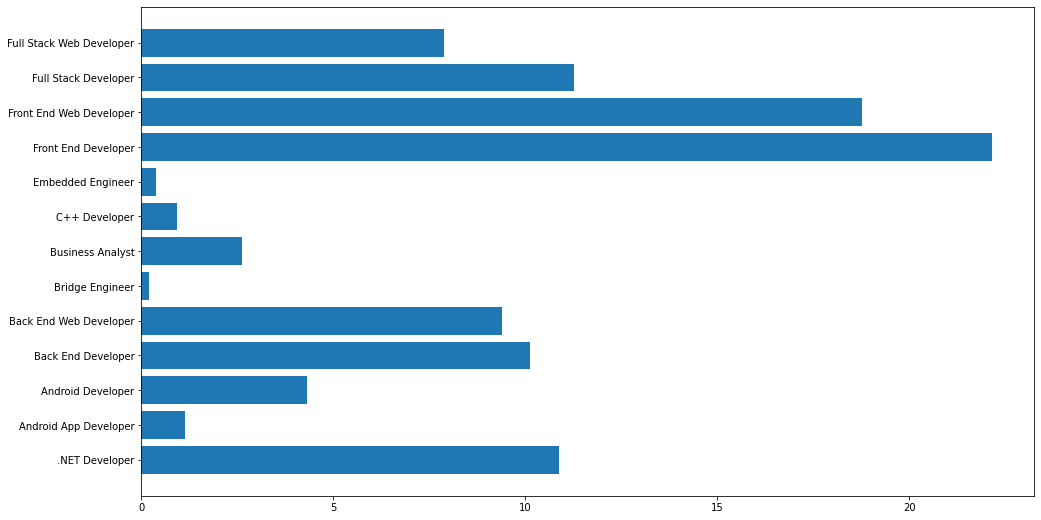

In [ ]:
show_job_suitable(list_job)

Input: 'có khả năng sử dụng javascript, java, docker, support, design'

# Save model BERTopics

In [ ]:
# Save model
# topic_model.save("my_model")

In [ ]:
# my_model = BERTopic.load("/content/drive/MyDrive/indeed/my_model")

# predict model BERTopics

In [ ]:
test = '''Data Cleaning & Exploration using Python, Data Modifying & Visualization using Microsoft Excel, Data Modifying & Visualization using Microsoft Excel
        Database Administrating using SQL Server'''

In [ ]:
def showResult(test):
  # handle string.
  test = re.sub(r"[!#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", '', test)
  test = test.replace('\n', '')
  tesst = test.lower()
  
  num_of_topics = 3
  similar_topics, similarity = topic_model.find_topics(tesst, top_n=num_of_topics); 

  # Print results
  #print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')
  # merge list job by topics
  list_job = []
  for i in range(num_of_topics):
    name =review.loc[review['topic_prediction'] == similar_topics[i],  'JobUrl']
    job = name.tolist()
    list_job += job
  #print(list_job)
  show_job_suitable(list_job)

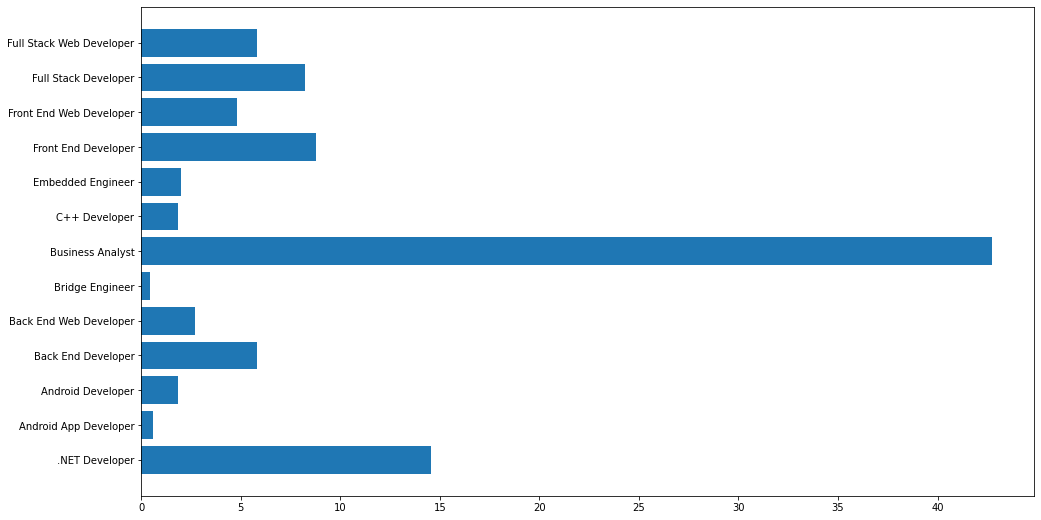

In [ ]:
showResult(test)

In [ ]:
test1 = '''using Reactjs and javascript, use to git, teamwork, design'''

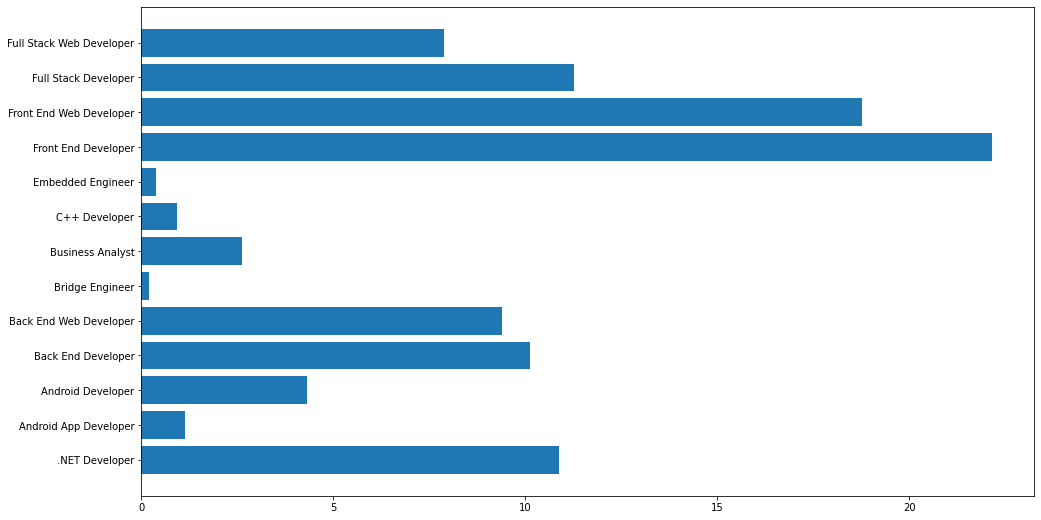

In [ ]:
showResult(test1)

In [ ]:
test2 = '''Rapidly prototyping and implementing scalable, reliable, and maintainable websites and applications via JavaScript, 
            TypeScript, and other web development technologies.
            Researching new technologies to apply in business projects..
            Building sustainable coding that may be used in the future
            Work with our development team to design, develop, and test web applications using JavaScript, HTML, and CSS. 
            Support the internal team to debug and troubleshoot issues that arise during the development process. 
            Participate in code reviews and contribute to the development of best practices for JavaScript development.'''

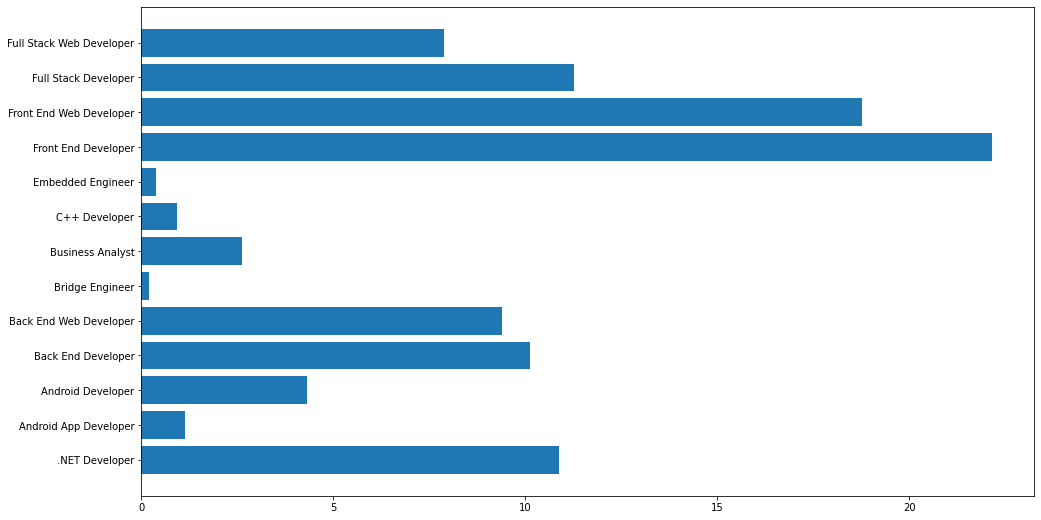

In [ ]:
showResult(test2)

# predict Model

In [ ]:
# data

In [ ]:
review.head()

,level_0,index,Summary,JobUrl,review,review_filter,Summary_without_stopwords,review_lemmatized,topic_prediction
0,8,0,Company DescriptionSmartDev is a leading provi...,.NET Developer,Net programming languagesTest and deploy appli...,Net programming languagesTest and deploy appli...,Net programming languagesTest deploy applicati...,Net programming languagesTest deploy applicati...,-1
1,9,0,Company DescriptionSmartDev is a leading provi...,.NET Developer,Net DeveloperBe familiar with ASP,Net DeveloperBe familiar with ASP,Net DeveloperBe familiar ASP,Net DeveloperBe familiar ASP,0
2,10,0,Company DescriptionSmartDev is a leading provi...,.NET Developer,"NET framework, SQL Server and design/ architec...","NET framework, SQL Server and design/ architec...","NET framework, SQL Server design/ architectura...","NET framework, SQL Server design/ architectura...",0
3,11,0,Company DescriptionSmartDev is a leading provi...,.NET Developer,"Net languages (C#, Visual Basic","Net languages (C#, Visual Basic","Net languages (C#, Visual Basic","Net language (C#, Visual Basic",0
4,12,0,Company DescriptionSmartDev is a leading provi...,.NET Developer,"Net), and HTML5/ CSS3Be familiar with architec...","Net), and HTML5/ CSS3Be familiar with architec...","Net), HTML5/ CSS3Be familiar architecture styl...","Net), HTML5/ CSS3Be familiar architecture styl...",0


In [ ]:
stirg ='''English fluency is a must
Fresh graduate or moderately experienced 1 year of experience in Data Analysis or Data Engineering
Fundamental programming skills in one or more languages such as Python or SQL
Familiarity with databases such as MySQL, PostgreSQL or Cassandra
Experience with data analysis and data visualization tools such as Quicksight or Grafana
Understanding of data modeling concepts and ETL processes
Strong analytical and problem-solving skills
Excellent communication and teamwork skills
Must be able to show initiative to get a job done with little / no supervision
Domain knowledge on digital marketing is a plus
AWS experience is a plus'''

In [ ]:
# got these keywords by looking at some examples and using existing knowledge.
tool_keywords = ['.net', 'java', 'azur', 'javascript', 'css3', 'azure', 'amazon', 'python', 'c', 'c++', 'c#', 'linux', 'angularjs', 'regularjs', 'requirejs', 'numpy', 'nuxtjs', 'xlsx',
			'microsoft', 'bootstrap', 'js', 'visual', 'typescript', 'snack', 'abi', 'nodejs', 'html5', 'reactjs', 'redhat', 'reactcharts', 'mongoldb', 'xmlhttprequest',
			'vscode', 'vuejs','melonjs', 'xampp', 'winform', 'wireless', 'wireshark', 'wordpress', 'virtualbox', 'google cloud', 'scala', 'django', 'hadoop', 'haoop', 'zookeep' , 'solr',
			'photoshop', 'php', 'phd', 'relayjs', 'oracle', 'opencv', 'p2p', 'redux', 'referenced', 'pytest', 'matplotlib', 'lavarel', 'nestjs', 'unix', 'git', 'redi',
			'pyspark', 'pytorch', 'protocol', 'sql', 'websocket', 'proptech', 'progresql', 'plsql', 'powerbi', 'powerdesigner', 'lambda', 'nuget', 'untiy3d', 'flutter',
			'tableau', 'scratch', 'scrum', 'scipy', 'scikit', 'simulated', 'screenshot', 'script', 'powerpoint', 'serves', 'excel', 'word', 'waveform', 'docker', 'mariadb', 'markdowns', 'matlab', 'melonjs', 'ngnix', 'ubuntu', 'toolkits']




# hard skills/knowledge required.
skill_keywords = ['refresh', 'probabilities', 'leader', 'portability', 'warehouse', 'maitainance', 'metadata', 'maximization', 'knowledgeable', 'modify', 'navigate',
 'manager', 'metastock', 'metaverse', 'psychology','pipline', 'programing', 'provides', 'prblem solving','predict', 'statistics',
'cleansing', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly', 'test case', 'tsql', 'databases', 'sql',
 'dashboard', 'geospatial', 'ocr', 'english', 'math', 'econometrics', 'marketing', 'tuning', 'hyperparameter', 'hypothesis',
 'salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory', 'logic', 'multithread',
 'recommender', 'recommendations', 'research', 'sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics', 
 'knn', 'outlier', 'etl', 'normalization', 'classification', 'optimizing', 'csdl', 'report', 'databases', 'sql', 'test',
 'clustering', 'cluster', 'design', 'optimization', 'visualization', 'nlp', 'negotiation', 'network', 'glm', 'uiux', 'teamwork', 'creative thinking',
  'gbm', 'boosting', 'recurrent', 'convolutional', 'bayesian', 'mindset', 'threadhandling', 'analytic', 'e-commerc',
  'support', 'teamwork', 'communicated', 'adaptability', 'coding', 'virtualization', 'organization', 'creativity']

In [ ]:
def result(string):
  strig = string.lower()
  strig = re.sub(r'[\W_]+', ' ', strig)
  st = ''
  arr = strig.split()
  for i in arr:
    if skill_keywords.__contains__(i):
      st += i
      st += ' '
    if tool_keywords.__contains__(i):
      st += i
      st += ' '
  return st

In [ ]:
result(stirg)

'english python sql sql databases visualization etl teamwork marketing '

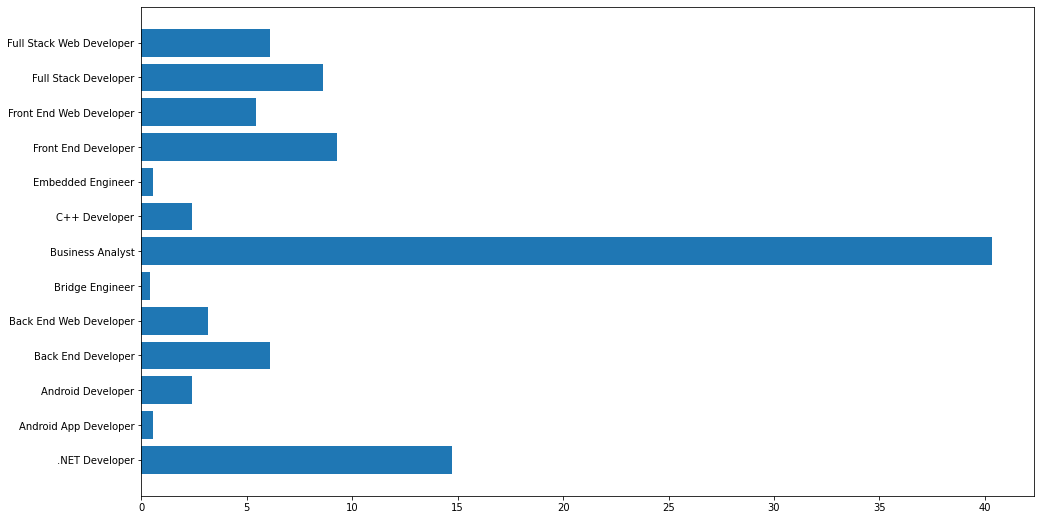

In [ ]:
showResult('Having experience with Programing Language such as R Python Report/dashboard visualization Tableau Power BI Qlik is a plus')

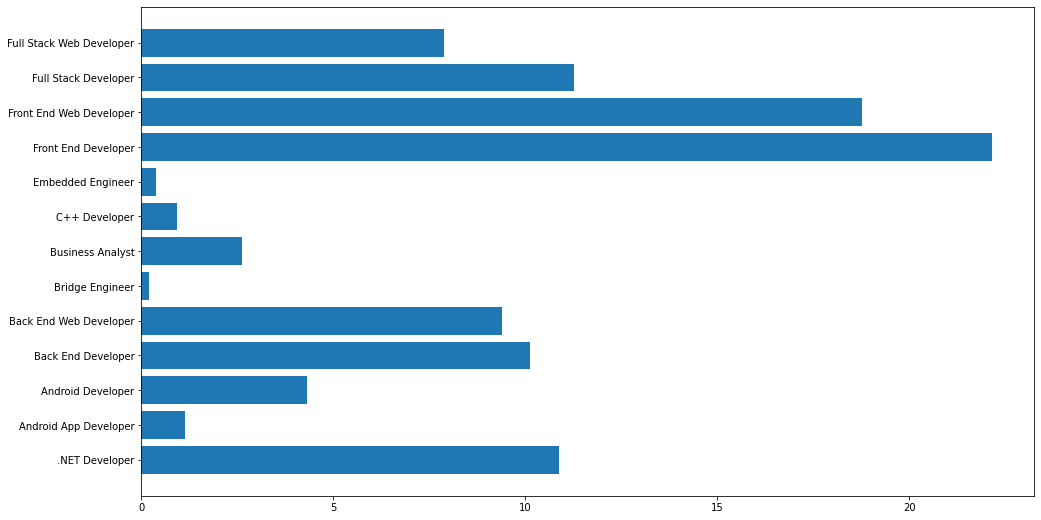

In [ ]:
show_job_suitable(list_job)

In [ ]:
dataCV = [ '''Data Cleaning & Exploration using Python, Data Modifying & Visualization using Microsoft Excel, 
              Data Modifying & Visualization using Microsoft Excel
              Database Administrating using SQL Server''',
        '''using Reactjs and javascript, use to git, teamwork, design''',
        '''Using R, SQL, visualization data''',
        '''Rapidly prototyping and implementing scalable, reliable, and maintainable websites and applications via JavaScript, 
            TypeScript, and other web development technologies.
            Researching new technologies to apply in business projects..
            Building sustainable coding that may be used in the future
            Work with our development team to design, develop, and test web applications using JavaScript, HTML, and CSS. 
            Support the internal team to debug and troubleshoot issues that arise during the development process. 
            Participate in code reviews and contribute to the development of best practices for JavaScript development.''', 
          '''English fluency is a must
            Fresh graduate or moderately experienced 1 year of experience in Data Analysis or Data Engineering
            Fundamental programming skills in one or more languages such as Python or SQL
            Familiarity with databases such as MySQL, PostgreSQL or Cassandra
            Experience with data analysis and data visualization tools such as Quicksight or Grafana
            Understanding of data modeling concepts and ETL processes
            Strong analytical and problem-solving skills
            Excellent communication and teamwork skills
            Must be able to show initiative to get a job done with little / no supervision
            Domain knowledge on digital marketing is a plus
            AWS experience is a plus''']

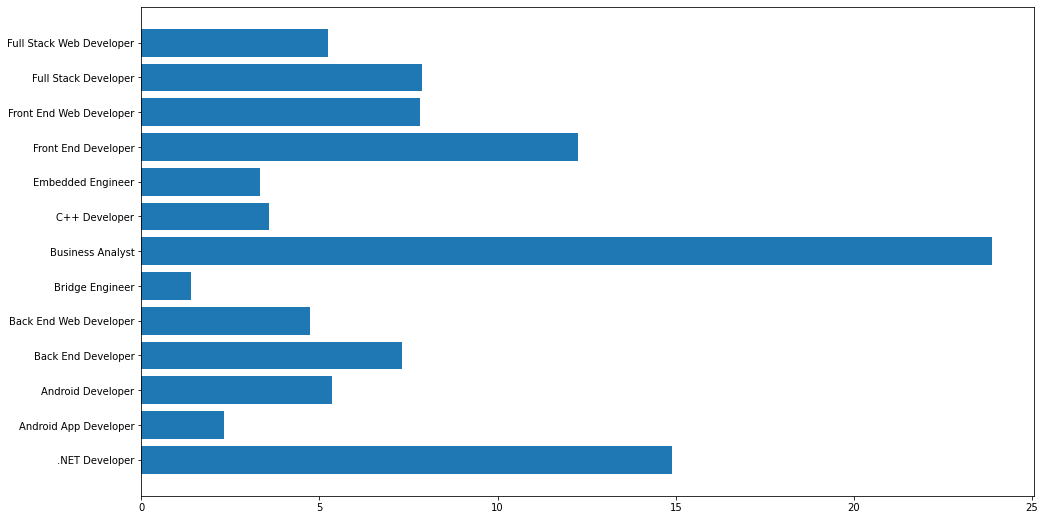

In [ ]:
showResult(dataCV[4])